## N-Asset Efficient Frontier

In [3]:
%load_ext autoreload
%autoreload 2
import importlib,sys
import numpy as np
import pandas as pd

sys.path.insert(1, "../week-one")
erk = importlib.import_module("edhec-risk-kit")

industry_returns = erk.get_industry_returns()

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-two/../week-one/edhec-risk-kit.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


In [4]:
expected_return = erk.annualize_returns(industry_returns["1996":"2000"], 12)
expected_return

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [5]:
cov = industry_returns["1996":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


```python
def plot_efficient_frontier(n_points, returns, covariance_matrix, style=".-"):
    """
    Plots the 2-asset efficient frontier
    """
    if returns.shape[0] != 2:
        raise ValueError("Plot_ef2 can only plot 2-asset frontiers")

    weights = ???
    portfolio_returns = [portfolio_return(w, returns) for w in weights]
    portfolio_volatilities = [portfolio_volatility(
        w, covariance_matrix) for w in weights]

    df_portfolio = pd.DataFrame({
        "Portfolio Returns": portfolio_returns,
        "Portfolio Volatilities": portfolio_volatilities
    })

    figure = plt.figure(figsize=(20, 20))

    return df_portfolio.plot(x="Portfolio Volatilities", y="Portfolio Returns", style=style)
```

```python
def plot_efficient_frontier(n_points, returns, covariance_matrix, style=".-"):
    """
    Plots the 2-asset efficient frontier
    """
    if returns.shape[0] != 2:
        raise ValueError("Plot_ef2 can only plot 2-asset frontiers")

    weights = minimize_volatility(target_return)????
    portfolio_returns = [portfolio_return(w, returns) for w in weights]
    portfolio_volatilities = [portfolio_volatility(
        w, covariance_matrix) for w in weights]

    df_portfolio = pd.DataFrame({
        "Portfolio Returns": portfolio_returns,
        "Portfolio Volatilities": portfolio_volatilities
    })

    figure = plt.figure(figsize=(20, 20))

    return df_portfolio.plot(x="Portfolio Volatilities", y="Portfolio Returns", style=style)
```

In [6]:
# minimize optimizer to minimize volatility
from scipy.optimize import minimize

<Axes: xlabel='Portfolio Volatilities'>

<Figure size 2000x2000 with 0 Axes>

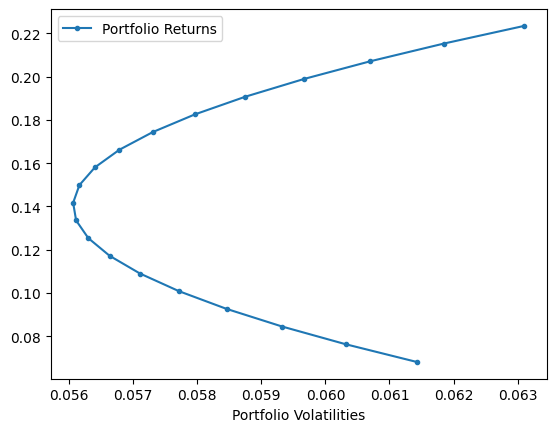

In [7]:
assets_spec = ["Games", "Fin"]

erk.plot_efficient_frontier(20, expected_return[assets_spec], covariance_matrix=cov.loc[assets_spec, assets_spec])

In [8]:
def minimize_volatility(target_return, expected_return, cov):
    """
    target_return -> w (Weight vector)
    """
    n = expected_return.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    
    # constraints #1
    return_is_target = {
        'type': 'eq',
        'args': (expected_return,),
        'fun': lambda weights, expected_return: target_return - erk.portfolio_return(weights, expected_return)
    }

    # constraints #2
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }

    results = minimize(
        erk.portfolio_volatility, init_guess,
        args=(cov,), method="SLSQP", options={"disp": False},
        constraints=(return_is_target, weights_sum_to_1),
        bounds=bounds
    )

    return results.x

In [9]:
assets_spec

['Games', 'Fin']

In [10]:
weights_15 = erk.minimize_volatility(0.15, expected_return=expected_return[assets_spec], cov=cov.loc[assets_spec, assets_spec])

weights_15

array([0.47287631, 0.52712369])

In [11]:

volatility_15 = erk.portfolio_volatility(weights_15, cov.loc[assets_spec, assets_spec])

volatility_15

0.056163669406706564

In [49]:
import matplotlib.pyplot as plt


def optimal_weights(n_points, expected_return, cov):
    """
    Generates list of weights to run the optimizer on to minimize the volatility
    """
    target_returns = np.linspace(
        expected_return.min(), expected_return.max(), n_points)
    weights = [minimize_volatility(
        target_return=target_return, expected_return=expected_return, cov=cov) for target_return in target_returns]

    return weights


def plot_efficient_frontier(n_points, expected_return, covariance_matrix):
    """
    Plots the multi-asset efficient frontier
    """

    weights = optimal_weights(n_points, expected_return, covariance_matrix)
    portfolio_returns = [erk.portfolio_return(w, expected_return) for w in weights]
    portfolio_volatilities = [erk.portfolio_volatility(
        w, covariance_matrix) for w in weights]

    df_portfolio = pd.DataFrame({
        "Portfolio Returns": portfolio_returns,
        "Portfolio Volatilities": portfolio_volatilities
    })

    figure = plt.figure(figsize=(20, 20))

    return df_portfolio.plot(x="Portfolio Volatilities", y="Portfolio Returns", style=".-")

<Axes: xlabel='Portfolio Volatilities'>

<Figure size 2000x2000 with 0 Axes>

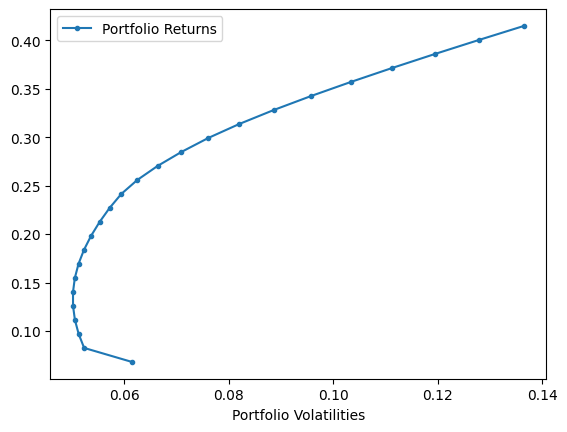

In [51]:
assets_spec = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_efficient_frontier(25, expected_return[assets_spec], cov.loc[assets_spec, assets_spec])